In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read CSV file
data_set = pd.read_csv("laptop_price - dataset.csv")
data_set.head()

,company,product,deviceType,Inches,ScreenResolution,cpuCompany,cpuModel,cpuFrequency,ram,storage,gpuManufacturer,gpuType,operatingSystem,weight,Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
# print the dimession of data_set and check if data_set including any null values
print(data_set.shape)
data_set.isnull().sum()

(1275, 15)


company             0
product             0
deviceType          0
Inches              0
ScreenResolution    0
cpuCompany          0
cpuModel            0
cpuFrequency        0
ram                 0
storage             0
gpuManufacturer     0
gpuType             0
operatingSystem     0
weight              0
Price (Euro)        0
dtype: int64

In [4]:
print(data_set.duplicated().sum())

0


<Axes: xlabel='ram', ylabel='count'>

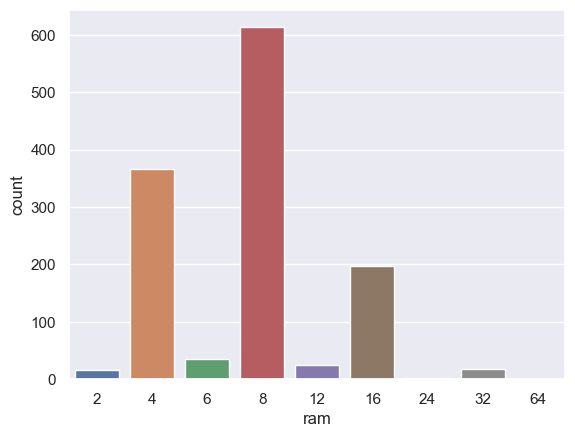

In [5]:
sns.set_theme()
sns.countplot(x=data_set["ram"])

<Axes: xlabel='weight', ylabel='Count'>

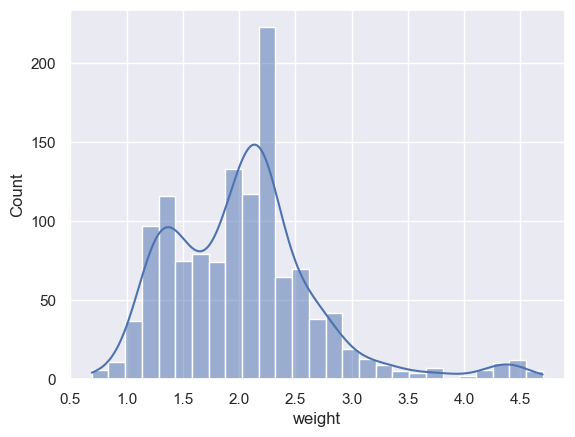

In [6]:
sns.histplot(data=data_set["weight"], kde=True)


<Axes: xlabel='cpuFrequency', ylabel='Count'>

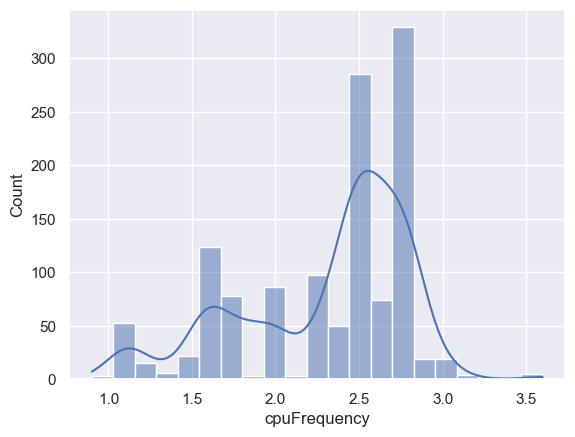

In [7]:
sns.histplot(data=data_set["cpuFrequency"], kde=True)


<Axes: xlabel='Inches', ylabel='Count'>

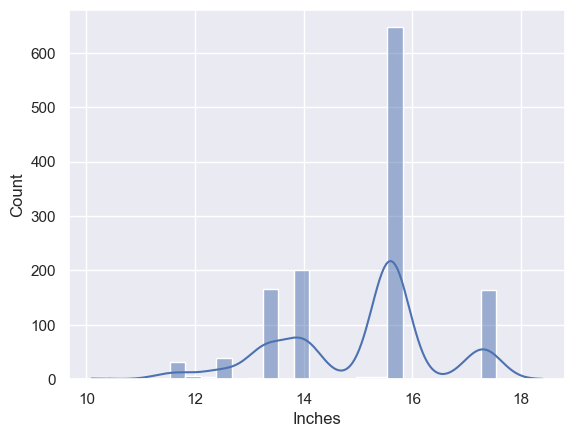

In [8]:
sns.histplot(data=data_set["Inches"],kde=True)


In [9]:
print("Number of unique values in each column : \n")

for col in data_set.columns:
    print(f"{col} : {data_set[col].nunique()} unique values")

Number of unique values in each column : 

company : 19 unique values
product : 618 unique values
deviceType : 6 unique values
Inches : 18 unique values
ScreenResolution : 40 unique values
cpuCompany : 3 unique values
cpuModel : 93 unique values
cpuFrequency : 25 unique values
ram : 9 unique values
storage : 39 unique values
gpuManufacturer : 4 unique values
gpuType : 106 unique values
operatingSystem : 9 unique values
weight : 171 unique values
Price (Euro) : 791 unique values


In [10]:
import joblib

In [11]:
# encode the unique value in string value into numeric value

from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in data_set.select_dtypes('object').columns:
    label_encoders[col] = LabelEncoder() 
    data_set[col] = label_encoders[col].fit_transform(data_set[col])
joblib.dump(label_encoders, "./artifact/label_encoders.pkl")



['./artifact/label_encoders.pkl']

In [12]:
# scale the value of numeric values to (0,1) by using minmaxscaler

from sklearn.preprocessing import MinMaxScaler

numerical_columns = data_set.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('Price (Euro)')

scaler = MinMaxScaler()
data_set[numerical_columns] = scaler.fit_transform(data_set[numerical_columns])
joblib.dump(scaler, "./artifact/scaler.pkl")


['./artifact/scaler.pkl']

In [13]:
# set the output and input for algorithm
x = data_set.drop(columns="Price (Euro)")
y = data_set["Price (Euro)"]

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2)

In [15]:
# using cross validation to check which is the best alpha for ridge regression

from sklearn.linear_model import RidgeCV
alphas = (1,3,5,7,9,11,13,15) 
model = RidgeCV(alphas=alphas, cv=5)
model.fit(x_train,y_train)
print("Best alpha:", model.alpha_)

Best alpha: 1


In [16]:
importance = model.coef_
# Show the importance of each feature
for i, v in enumerate(importance):
    print(f"Feature: {data_set.columns[i]}, Score: {v}")

Feature: company, Score: 210.61719357366573
Feature: product, Score: 94.12951984268281
Feature: deviceType, Score: 201.4568466788965
Feature: Inches, Score: -697.693817958859
Feature: ScreenResolution, Score: 421.7401625659488
Feature: cpuCompany, Score: 206.11924264760626
Feature: cpuModel, Score: 599.4429569246903
Feature: cpuFrequency, Score: 764.0984428301808
Feature: ram, Score: 3761.4317243566807
Feature: storage, Score: 346.1658997071289
Feature: gpuManufacturer, Score: 344.9506023111577
Feature: gpuType, Score: 304.62294357402607
Feature: operatingSystem, Score: 702.8676871024566
Feature: weight, Score: 676.510469976331


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_train , y_train)
joblib.dump(model,filename="./model/linear_model.pkl")

['./model/linear_model.pkl']

In [50]:
alphas = (0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14) 
model = RidgeCV(alphas=alphas, cv=5)
model.fit(x_train,y_train)
print("Best alpha:", model.alpha_)
joblib.dump(model,filename="./model/ridge_model.pkl")

Best alpha: 0.09


['./model/ridge_model.pkl']

In [51]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes = (200,200,200,200,200),
                     activation = 'relu',
                     learning_rate_init=0.01,
                     learning_rate="adaptive",
                     max_iter=1000, random_state=42
                     )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
joblib.dump(model,filename="./model/mlp_model.pkl")

['./model/mlp_model.pkl']

In [52]:
from sklearn.ensemble import BaggingRegressor
linear = joblib.load(filename="./model/linear_model.pkl")

In [53]:

model = BaggingRegressor(estimator=linear,n_estimators=100, max_samples=500,max_features=7, random_state=42)
model.fit(x_train, y_train)
joblib.dump(model,filename="./model/linear_bagging_model.pkl")

['./model/linear_bagging_model.pkl']

In [21]:
ridge = joblib.load(filename="./model/ridge_model.pkl")
model = BaggingRegressor(estimator=ridge,n_estimators=100, max_samples=500,max_features=7, random_state=42)
model.fit(x_train, y_train)
joblib.dump(model,filename="./model/ridge_bagging_model.pkl")

['./model/ridge_bagging_model.pkl']

In [22]:
mlp = joblib.load(filename="./model/mlp_model.pkl")
model = BaggingRegressor(estimator=mlp,n_estimators=15, max_samples=500,max_features=7, random_state=42)
model.fit(x_train, y_train)
joblib.dump(model,filename="./model/mlp_bagging_model.pkl")

['./model/mlp_bagging_model.pkl']

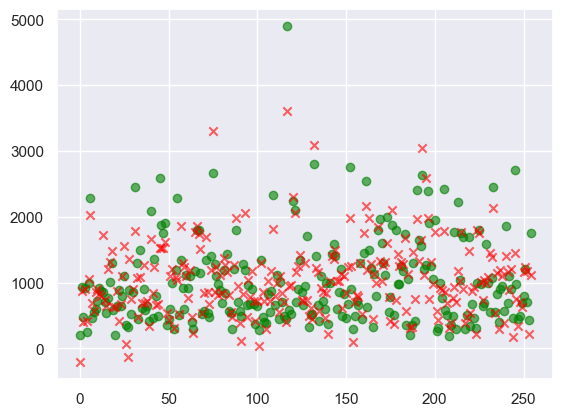

In [23]:
linear = joblib.load(filename="model/linear_model.pkl")
y_pred = linear.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')

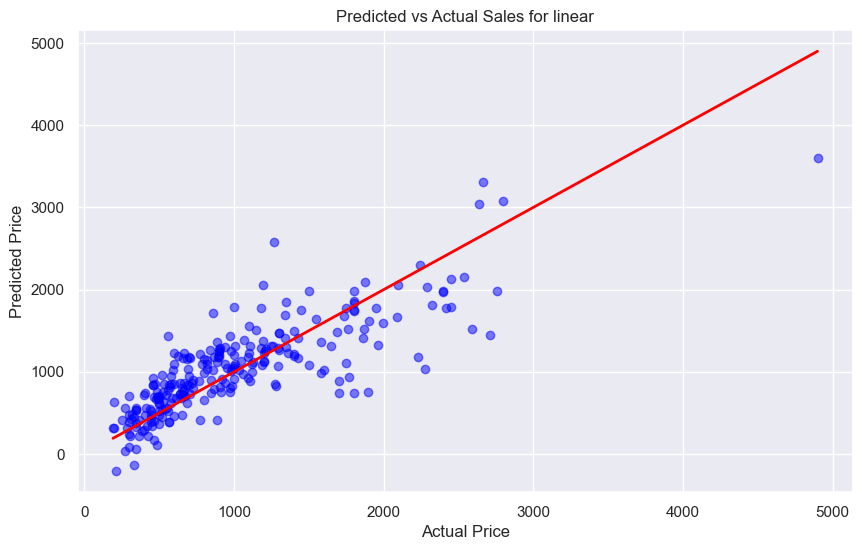

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for linear')
plt.grid(True)
plt.show()

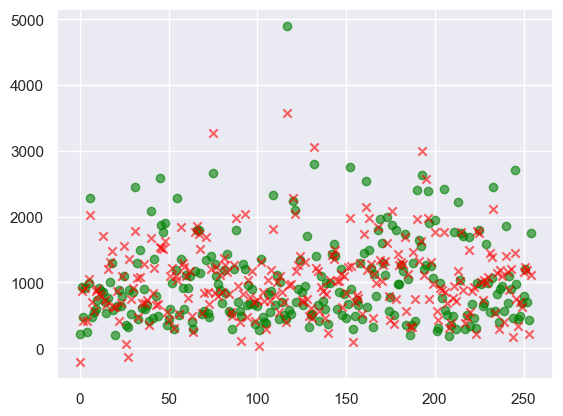

In [25]:
ridge = joblib.load(filename="model/ridge_model.pkl")
y_pred = ridge.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')


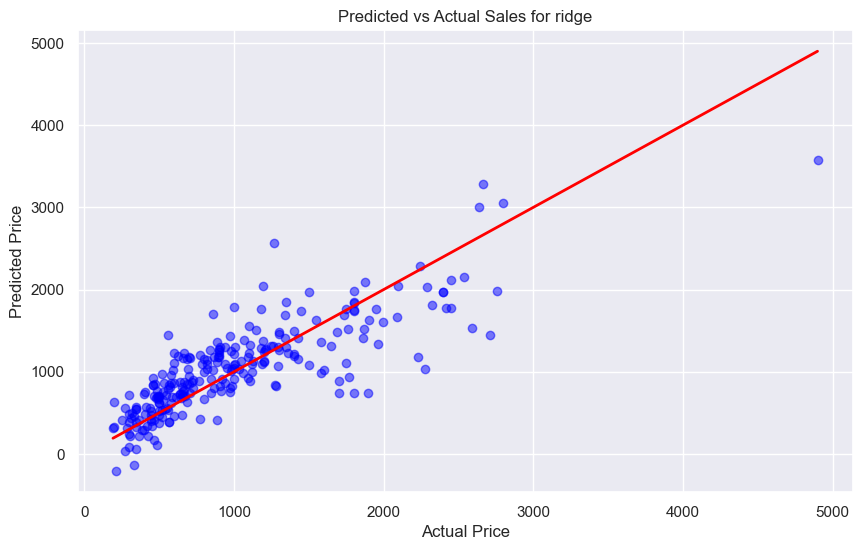

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for ridge')
plt.grid(True)
plt.show()

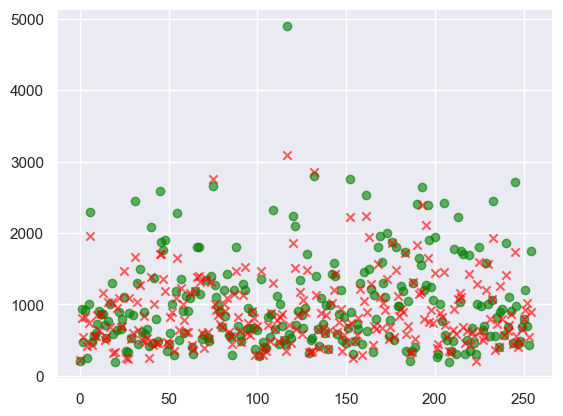

In [27]:
mlp = joblib.load(filename="model/mlp_model.pkl")
y_pred = mlp.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')

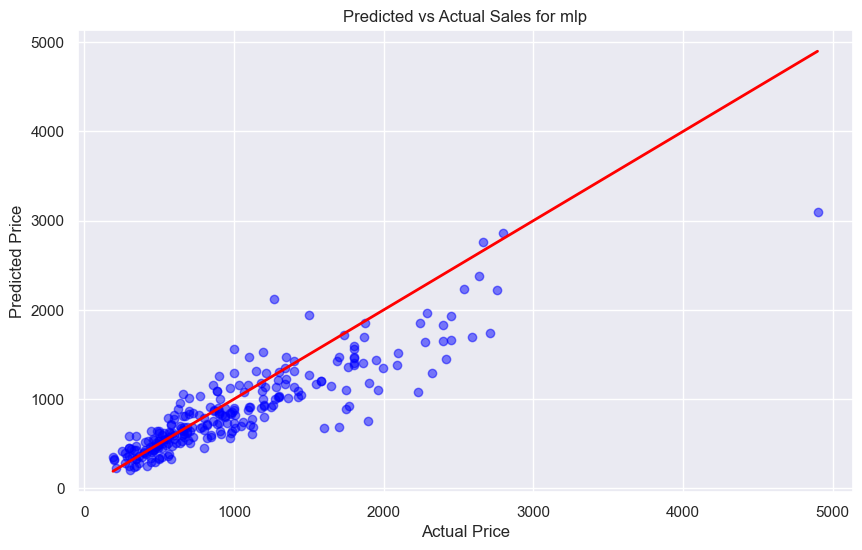

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for mlp')
plt.grid(True)
plt.show()

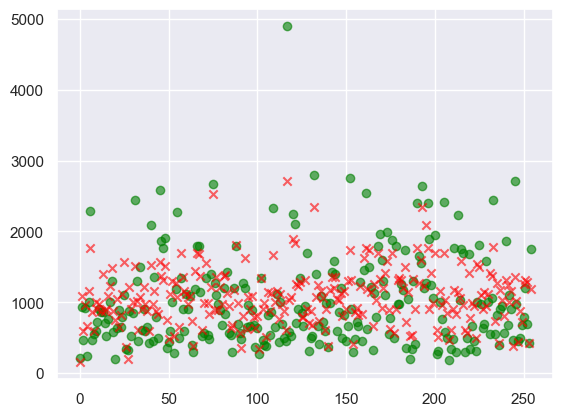

In [29]:
linear_bagging = joblib.load(filename="model/linear_bagging_model.pkl")
y_pred = linear_bagging.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')

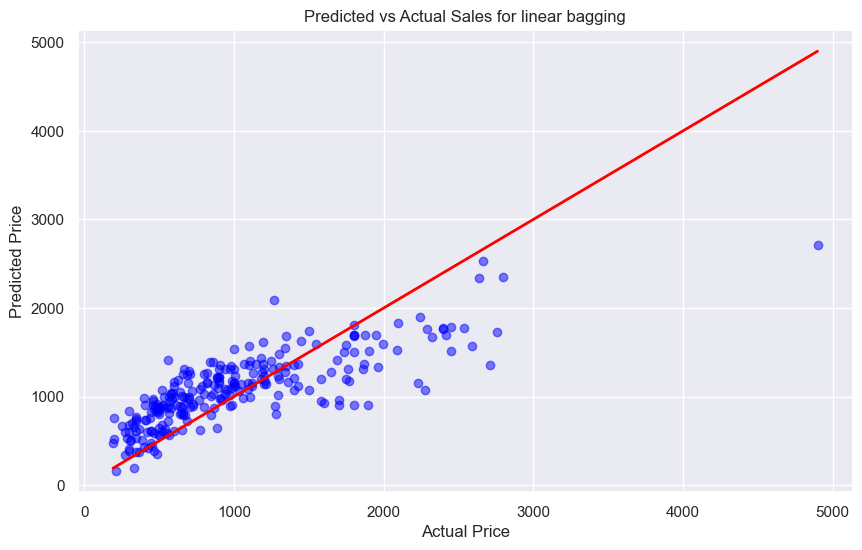

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for linear bagging')
plt.grid(True)
plt.show()

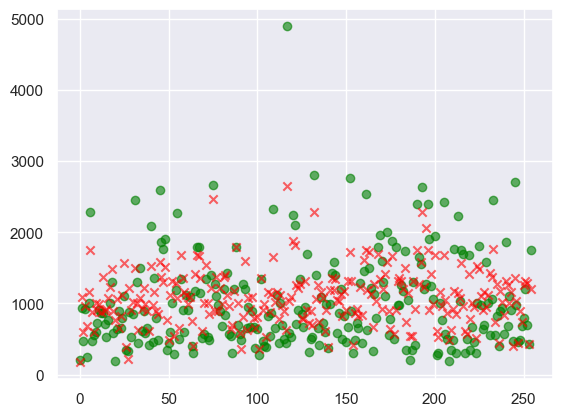

In [31]:
ridge_bagging = joblib.load(filename="model/ridge_bagging_model.pkl")
y_pred = ridge_bagging.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')

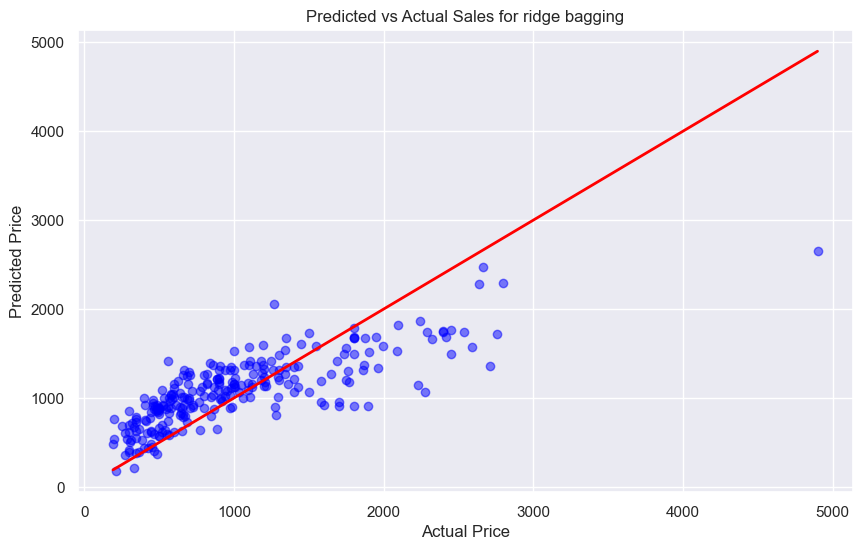

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for ridge bagging')
plt.grid(True)
plt.show()

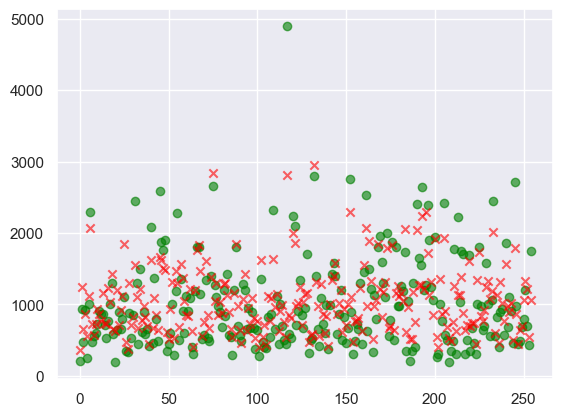

In [33]:
mlp_bagging = joblib.load(filename="model/mlp_bagging_model.pkl")
y_pred = mlp_bagging.predict(x_test)
plt.scatter(range(len(y_test)), y_test, color='green', label='Test data (True)', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Test data (Predicted)', alpha=0.6, marker='x')

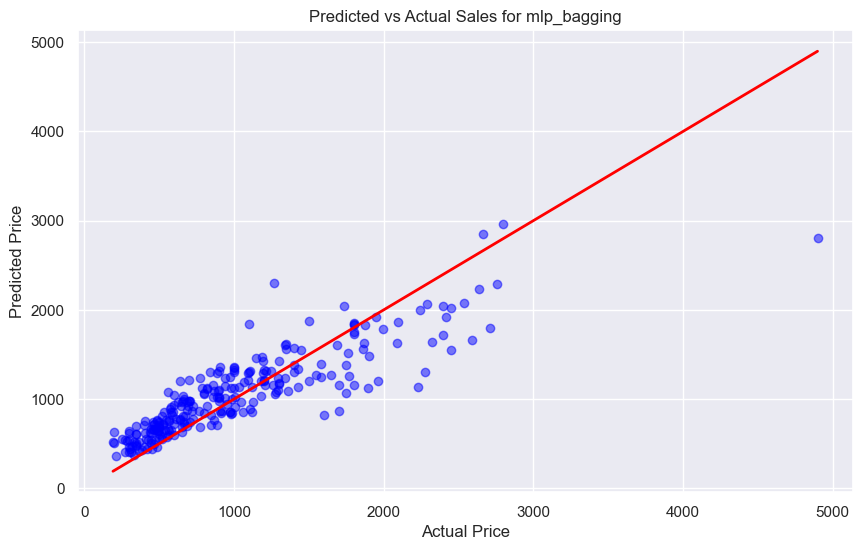

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Sales for mlp_bagging')
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

linear = joblib.load(filename="model/linear_model.pkl")
y_pred = linear.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("linear")
MSE, r2

linear


(135796.97573440048, 0.6758592713603808)

In [36]:
ridge = joblib.load(filename="model/ridge_model.pkl")
y_pred = ridge.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("ridge")
MSE, r2

ridge


(135940.7257882665, 0.6755161470238473)

In [37]:
mlp = joblib.load(filename="model/mlp_model.pkl")
y_pred = mlp.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("mlp")
MSE, r2

mlp


(113104.43181737955, 0.73002526202527)

In [38]:
linear_bagging = joblib.load(filename="model/linear_bagging_model.pkl")
y_pred = linear_bagging.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("linear bagging")
MSE, r2

linear bagging


(166414.1957211866, 0.6027774671319357)

In [39]:
ridge_bagging = joblib.load(filename="model/ridge_bagging_model.pkl")
y_pred = ridge_bagging.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("ridge bagging")
MSE, r2

ridge bagging


(170832.1943225645, 0.5922319208998874)

In [40]:
mlp_bagging = joblib.load(filename="model/mlp_bagging_model.pkl")
y_pred = mlp_bagging.predict(x_test)
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("mlp bagging")
MSE, r2

mlp bagging


(109748.91037853755, 0.7380347273191026)